In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from census import Census
from us import states
import os
import numpy as np
import config

In [8]:
c = Census(config.census_api)
states

<module 'us.states' from 'c:\\Users\\Jennah\\anaconda3\\envs\\bloom\\lib\\site-packages\\us\\states.py'>

In [3]:
state_codes = {
    'WA': '53', 'DE': '10', 'DC': '11', 'WI': '55', 'WV': '54', 'HI': '15',
    'FL': '12', 'WY': '56', 'PR': '72', 'NJ': '34', 'NM': '35', 'TX': '48',
    'LA': '22', 'NC': '37', 'ND': '38', 'NE': '31', 'TN': '47', 'NY': '36',
    'PA': '42', 'AK': '02', 'NV': '32', 'NH': '33', 'VA': '51', 'CO': '08',
    'CA': '06', 'AL': '01', 'AR': '05', 'VT': '50', 'IL': '17', 'GA': '13',
    'IN': '18', 'IA': '19', 'MA': '25', 'AZ': '04', 'ID': '16', 'CT': '09',
    'ME': '23', 'MD': '24', 'OK': '40', 'OH': '39', 'UT': '49', 'MO': '29',
    'MN': '27', 'MI': '26', 'RI': '44', 'KS': '20', 'MT': '30', 'MS': '28',
    'SC': '45', 'KY': '21', 'OR': '41', 'SD': '46'
}

In [54]:
len(state_codes.keys())

52

In [29]:
census_dfs = []
for i in state_codes:
    census_dfs.append(c.acs5.state_county_tract(fields = ('NAME', 'B19019_001E', 'B02001_001E', 'B16009_002E', 'B01003_001E', 'B02001_002E', 'B02001_003E',
                                                          'B02001_003E', 'B02001_005E', 'B03001_003E'),
                                      state_fips = state_codes[i],
                                      county_fips = "*",
                                      tract = "*",
                                      year = 2019))

In [31]:
census_df = pd.concat([pd.DataFrame(x) for x in census_dfs], axis=0).rename({'B19019_001E': 'median_household_income',
                                                                             'B02001_001E': 'total_pop_race',
                                                                             'B16009_002E': 'poverty',
                                                                             'B01003_001E': 'total_pop',
                                                                             'B02001_002E': 'white',
                                                                             'B02001_003E': 'black',
                                                                             'B02001_005E': 'asian',
                                                                             'B03001_003E': 'hispanic_latino'
                                                                             }, axis=1)
census_df

,NAME,median_household_income,total_pop_race,poverty,total_pop,white,black,asian,hispanic_latino,state,county,tract
0,"Census Tract 416, Clark County, Washington",37083.0,3486.0,606.0,3486.0,2282.0,351.0,80.0,1033.0,53,011,041600
1,"Census Tract 430, Clark County, Washington",61771.0,1993.0,164.0,1993.0,1706.0,41.0,96.0,444.0,53,011,043000
2,"Census Tract 408.05, Clark County, Washington",98911.0,6981.0,510.0,6981.0,6362.0,48.0,224.0,300.0,53,011,040805
3,"Census Tract 404.03, Clark County, Washington",92546.0,4204.0,292.0,4204.0,3967.0,115.0,63.0,174.0,53,011,040403
4,"Census Tract 406.04, Clark County, Washington",88561.0,5810.0,301.0,5810.0,4852.0,79.0,253.0,651.0,53,011,040604
...,...,...,...,...,...,...,...,...,...,...,...,...
217,"Census Tract 9659, Clay County, South Dakota",32385.0,6131.0,1592.0,6131.0,5223.0,221.0,205.0,239.0,46,027,965900
218,"Census Tract 9543.01, Codington County, South ...",40701.0,4577.0,882.0,4577.0,4226.0,43.0,45.0,71.0,46,029,954301
219,"Census Tract 9543.02, Codington County, South ...",79727.0,5098.0,189.0,5098.0,4914.0,127.0,34.0,34.0,46,029,954302
220,"Census Tract 9545.01, Codington County, South ...",49348.0,2492.0,433.0,2492.0,2243.0,8.0,7.0,130.0,46,029,954501


In [32]:
census_df.shape

(74001, 12)

In [33]:
tract_shape = []
for i in state_codes:
    tract_shape.append(gpd.read_file(f"https://www2.census.gov/geo/tiger/TIGER2019/TRACT/tl_2019_{state_codes[i]}_tract.zip"))

In [34]:
tract_gdf = pd.concat(tract_shape, axis=0).reset_index()
tract_gdf

,index,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,0,53,049,950800,53049950800,9508,Census Tract 9508,G5020,S,42157200,107412602,+46.5827228,-124.0272568,"POLYGON ((-124.08567 46.71716, -124.08256 46.7..."
1,1,53,061,051701,53061051701,517.01,Census Tract 517.01,G5020,S,2491298,0,+47.8299704,-122.2999369,"POLYGON ((-122.31500 47.82142, -122.31498 47.8..."
2,2,53,061,051918,53061051918,519.18,Census Tract 519.18,G5020,S,4477551,0,+47.7834467,-122.2143909,"POLYGON ((-122.23305 47.78378, -122.23304 47.7..."
3,3,53,061,052006,53061052006,520.06,Census Tract 520.06,G5020,S,1932452,0,+47.8494718,-122.1963226,"POLYGON ((-122.20972 47.84538, -122.20963 47.8..."
4,4,53,061,052105,53061052105,521.05,Census Tract 521.05,G5020,S,51597252,3007422,+47.8770813,-122.0961284,"POLYGON ((-122.18909 47.92844, -122.18611 47.9..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73996,217,46,081,966301,46081966301,9663.01,Census Tract 9663.01,G5020,S,121953995,301439,+44.5510342,-103.9491554,"POLYGON ((-104.05597 44.56310, -104.05595 44.5..."
73997,218,46,081,966600,46081966600,9666,Census Tract 9666,G5020,S,1080589898,156413,+44.2609032,-103.7870725,"POLYGON ((-104.05563 44.36380, -104.05563 44.3..."
73998,219,46,011,958600,46011958600,9586,Census Tract 9586,G5020,S,933997276,6323802,+44.3767751,-096.5957541,"POLYGON ((-96.75838 44.19721, -96.75739 44.207..."
73999,220,46,011,959000,46011959000,9590,Census Tract 9590,G5020,S,12725733,216908,+44.2768342,-096.7748038,"POLYGON ((-96.78859 44.30193, -96.78858 44.302..."


<Axes: >

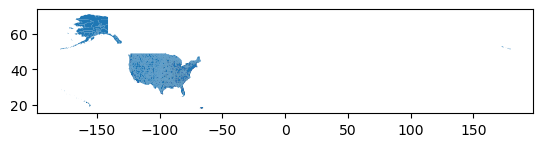

In [35]:
tract_gdf.plot()

In [52]:
# load algae data
algae = pd.read_csv("data/metadata.csv")
algae.loc[algae['split']=='train'].shape

(17060, 5)

In [37]:
algae_gdf = gpd.GeoDataFrame(
    algae, geometry=gpd.points_from_xy(algae['longitude'], algae['latitude'], crs=4326)).to_crs(4269)
algae_gdf

,uid,latitude,longitude,date,split,geometry
0,aabm,39.080319,-86.430867,2018-05-14,train,POINT (-86.43087 39.08032)
1,aabn,36.559700,-121.510000,2016-08-31,test,POINT (-121.51000 36.55970)
2,aacd,35.875083,-78.878434,2020-11-19,train,POINT (-78.87843 35.87508)
3,aaee,35.487000,-79.062133,2016-08-24,train,POINT (-79.06213 35.48700)
4,aaff,38.049471,-99.827001,2019-07-23,train,POINT (-99.82700 38.04947)
...,...,...,...,...,...,...
23565,zzvv,36.708500,-121.749000,2014-12-02,test,POINT (-121.74900 36.70850)
23566,zzwo,39.792190,-99.971050,2017-06-19,train,POINT (-99.97105 39.79219)
23567,zzwq,35.794000,-79.012551,2015-03-24,train,POINT (-79.01255 35.79400)
23568,zzyb,35.742000,-79.238600,2016-11-21,train,POINT (-79.23860 35.74200)


In [38]:
algae_mgd = algae_gdf.sjoin(tract_gdf, how="left")

In [39]:
algae_mgd['GEOID'].isna().sum()

414

In [40]:
algae_mgd.shape

(23570, 20)

In [41]:
dist = algae_gdf.distance(tract_gdf)

c:\Users\Jennah\anaconda3\envs\bloom\lib\site-packages\geopandas\base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")
C:\Users\Jennah\AppData\Local\Temp\ipykernel_12084\4264339749.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dist = algae_gdf.distance(tract_gdf)


In [42]:
def calculate_nearest_tract(row, tracts):
    distances = tracts.distance(row)
    return tracts.iloc[np.argmin(distances)]['GEOID']

distances = algae_mgd.loc[algae_mgd['GEOID'].isna()]['geometry'].apply(lambda x: calculate_nearest_tract(x, tract_gdf))
distances

C:\Users\Jennah\AppData\Local\Temp\ipykernel_12084\2426624031.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'distance' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  distances = tracts.distance(row)


171      42049990000
191      36063990000
214      36063990000
216      39123050100
309      36117990100
            ...     
23135    36073990000
23170    26151990000
23222    39085990000
23317    26151990000
23359    26083990100
Name: geometry, Length: 414, dtype: object

In [43]:
algae_mgd.loc[algae_mgd['GEOID'].isna(), "GEOID"] = distances

In [44]:
assert algae_mgd["GEOID"].isna().sum() == 0

In [45]:
tract_subset = tract_gdf.loc[tract_gdf["GEOID"].isin(algae_mgd["GEOID"])]
tract_subset.head()

,index,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
43,43,53,073,010100,53073010100,101,Census Tract 101,G5020,S,4235102810,109421486,+48.8498915,-121.4903838,"POLYGON ((-122.29365 48.84161, -122.29328 48.8..."
70,70,53,063,014200,53063014200,142,Census Tract 142,G5020,S,645175261,10578675,+47.3660074,-117.6307756,"POLYGON ((-117.82363 47.26035, -117.82363 47.2..."
157,157,53,027,000200,53027000200,2,Census Tract 2,G5020,S,317810724,100290097,+47.1038049,-124.1174848,"POLYGON ((-124.22290 47.24431, -124.22319 47.2..."
172,172,53,019,940000,53019940000,9400,Census Tract 9400,G5020,S,2807565536,120249124,+48.2182274,-118.5224708,"POLYGON ((-118.85197 47.95781, -118.85196 47.9..."
180,180,53,031,950202,53031950202,9502.02,Census Tract 9502.02,G5020,S,251348675,80633463,+47.8392523,-122.9122676,"POLYGON ((-123.03756 47.86690, -123.03443 47.8..."


In [46]:
tract_subset.shape

(1660, 14)

In [47]:
len(algae_mgd['GEOID'].unique())
len(algae_mgd['uid'].unique())

23570

In [65]:
algae_mgd.loc[algae_mgd['GEOID'].str.contains('37037'), 'GEOID'].value_counts().sum()

5308

<Axes: >

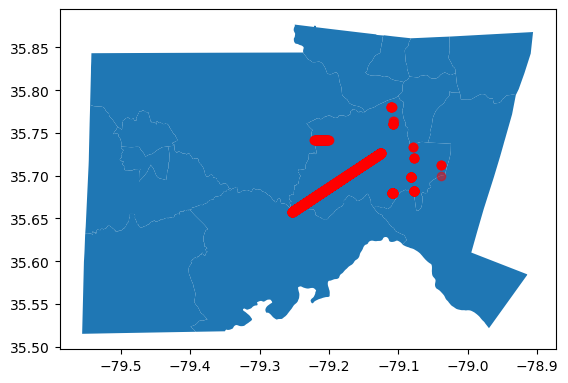

In [58]:
fig, ax = plt.subplots(1, 1)
tract_gdf.loc[(tract_gdf['STATEFP']=='37') & (tract_gdf['COUNTYFP']=='037')].plot(ax=ax)
algae_mgd.loc[algae_mgd['GEOID']=='37037020800'].plot(ax=ax, color='red', alpha=0.5)


In [50]:
algae_mgd.to_csv("./data/algae_pts_with_tracts.csv")

In [61]:
algae_mgd.loc[algae_mgd['GEOID']=='37037020800']['date'].value_counts()

2016-08-10    56
2016-10-05    40
2016-08-31    37
2016-06-22    36
2016-05-25    35
              ..
2013-06-26     1
2013-06-06     1
2013-07-23     1
2018-06-04     1
2013-05-30     1
Name: date, Length: 237, dtype: int64

In [63]:
algae_mgd.loc[algae_mgd['GEOID']=='37037020800']

,uid,latitude,longitude,date,split,geometry,index_right,index,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON
8,aahy,35.726522,-79.125458,2014-08-12,train,POINT (-79.12546 35.72652),19420.0,1077.0,37,037,020800,37037020800,208,Census Tract 208,G5020,S,181755283.0,14479953.0,+35.7143431,-079.1474408
29,aauw,35.703553,-79.168119,2019-06-06,train,POINT (-79.16812 35.70355),19420.0,1077.0,37,037,020800,37037020800,208,Census Tract 208,G5020,S,181755283.0,14479953.0,+35.7143431,-079.1474408
34,aaxb,35.722929,-79.132131,2018-08-27,train,POINT (-79.13213 35.72293),19420.0,1077.0,37,037,020800,37037020800,208,Census Tract 208,G5020,S,181755283.0,14479953.0,+35.7143431,-079.1474408
38,abau,35.682235,-79.207716,2016-06-21,train,POINT (-79.20772 35.68224),19420.0,1077.0,37,037,020800,37037020800,208,Census Tract 208,G5020,S,181755283.0,14479953.0,+35.7143431,-079.1474408
40,abbz,35.715424,-79.146072,2016-06-08,train,POINT (-79.14607 35.71542),19420.0,1077.0,37,037,020800,37037020800,208,Census Tract 208,G5020,S,181755283.0,14479953.0,+35.7143431,-079.1474408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23527,zypw,35.667810,-79.234509,2016-08-10,train,POINT (-79.23451 35.66781),19420.0,1077.0,37,037,020800,37037020800,208,Census Tract 208,G5020,S,181755283.0,14479953.0,+35.7143431,-079.1474408
23529,zytb,35.708903,-79.158183,2021-05-18,train,POINT (-79.15818 35.70890),19420.0,1077.0,37,037,020800,37037020800,208,Census Tract 208,G5020,S,181755283.0,14479953.0,+35.7143431,-079.1474408
23542,zzdl,35.718165,-79.140980,2018-05-01,train,POINT (-79.14098 35.71816),19420.0,1077.0,37,037,020800,37037020800,208,Census Tract 208,G5020,S,181755283.0,14479953.0,+35.7143431,-079.1474408
23546,zzes,35.672707,-79.225413,2021-09-09,train,POINT (-79.22541 35.67271),19420.0,1077.0,37,037,020800,37037020800,208,Census Tract 208,G5020,S,181755283.0,14479953.0,+35.7143431,-079.1474408
